# Section 1 – Theoretical Questions

## 1. Research Questions and Approach
The research question is:  
**How do education, income, and demographic characteristics affect household expenditure patterns, and which statistical learning approach best models these relationships?**

To answer this, I focus on predicting **Monthly Household Expenditure** (`Mthly_HH_Expense`) using a set of explanatory variables:
- **Income variables**: Monthly household income (`Mthly_HH_Income`)
- **Demographics**: Number of family members (`No_of_Fly_Members`), number of earning members (`No_of_Earning_Members`)
- **Obligations**: EMI or rent amount (`Emi_or_Rent_Amt`)
- **Education**: Highest qualified member (`Highest_Qualified_Member`)

The primary approach is **Multiple Linear Regression**, since it provides interpretable coefficients consistent with economic theory (marginal changes in expenditure given unit changes in predictors). To test predictive robustness, I compare it with an alternative method -- **Decision Tree Regression** -- using cross-validation. This allows both interpretability (linear model) and a check for possible non-linearities (decision tree).

---

## 2. Alternative Approaches
One alternative model is a **Decision Tree Regressor**. Decision trees are flexible and can capture complex, non-linear relationships between variables (e.g., threshold effects of income or education on expenditure). However, given the **small sample size (n=50)**, trees are prone to **high variance** and overfitting.  

Linear regression is preferred because:
- It is more **interpretable**: coefficients align with economic reasoning.  
- It has **lower variance** on small datasets.  
- It allows clearer identification of the direction and strength of effects.  

Thus, while the decision tree is useful for robustness checks, the **linear model remains the main tool** due to its balance between accuracy, simplicity, and interpretability.

---

## 3. Data Description
The dataset consists of 50 households with the following variables:

| Variable                  | Type          | Role           | Description                                    |
|---------------------------|--------------|---------------|------------------------------------------------|
| `Mthly_HH_Expense`        | Quantitative | Dependent      | Monthly household expenditure                  |
| `Mthly_HH_Income`         | Quantitative | Independent    | Monthly household income                       |
| `Annual_HH_Income`        | Quantitative | Independent    | Annual household income, dropped due to collinearity |
| `No_of_Fly_Members`       | Quantitative | Independent    | Total family members                           |
| `No_of_Earning_Members`   | Quantitative | Independent    | Number of earning members in the household     |
| `Emi_or_Rent_Amt`         | Quantitative | Independent    | Monthly EMI or rent obligations                |
| `Highest_Qualified_Member`| Qualitative  | Independent    | Education level of highest qualified member (Illiterate, Graduate, etc.) |

The **dependent variable** is monthly expenditure. Independent variables capture **income, demographics, fixed obligations, and education** -- key determinants of consumption in household economics.

---

## 4. Expected Results and Limitations
**Expected Results (before modeling):**
- **Income (monthly, annual):** Positive effect -- higher income leads to higher consumption expenditure.  
- **Household size:** Positive effect -- more members increase total household outlays.  
- **Number of earners:** Expected positive -- more income sources should increase expenditure.  
- **EMI/Rent:** Positive -- higher obligations raise monthly spending.  
- **Education:** Expected positive -- more educated households may spend more on quality goods and services.

**Limitations:**
- **Sample size:** Only 50 observations, which limits generalizability and may reduce statistical power.  
- **Multicollinearity:** Monthly and annual income are highly correlated; hence, annual income is excluded.  
- **Endogeneity:** Income and expenditure may influence each other simultaneously.  
- **Omitted variables:** Important drivers like location, wealth, or age distribution are missing.  
- **Categorical encoding:** Education is encoded numerically; although robustness checks with one-hot encoding are possible, small sample size restricts reliability.

---

# Section 1 Summary
This section frames the problem in economic and statistical terms.  
- The **linear regression model** is the primary tool due to interpretability and theoretical grounding.  
- A **decision tree model** is tested as an alternative for robustness.  
- The dataset clearly defines expenditure as the dependent variable, with demographic, income, and education predictors.  
- Pre-model expectations align with classical economic reasoning, while limitations highlight the dataset’s constraints.


=== Dataset Overview ===

   Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0             5000              8000                  3             2000   
1             6000              7000                  2             3000   
2            10000              4500                  2                0   
3            10000              2000                  1                0   
4            12500             12000                  2             3000   

   Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  
0             64200           Under-Graduate                      1  
1             79920               Illiterate                      1  
2            112800           Under-Graduate                      1  
3             97200               Illiterate                      1  
4            147000                 Graduate                      1   

Shape: (50, 7)

Column Data Types:
 Mthly_HH_Income              int64
Mthly_HH_Expense        

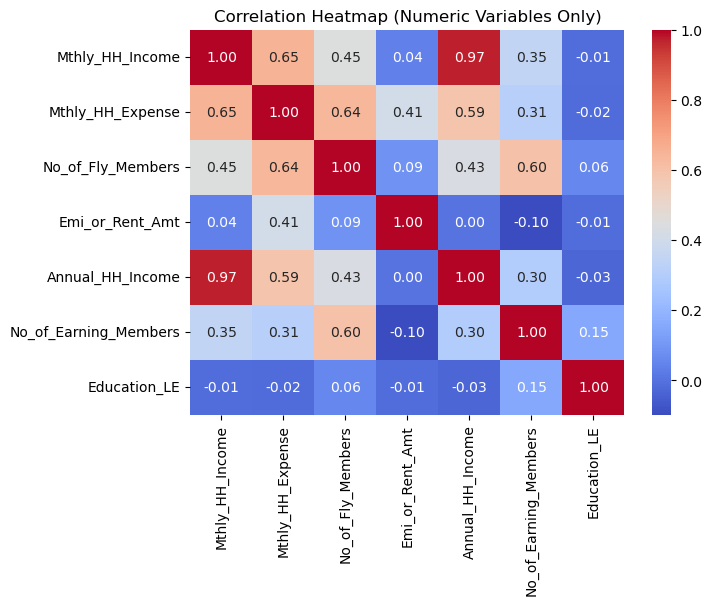

=== Model Comparison Results ===

                   R² (test)    MSE (test)  CV R² (mean)  CV MSE (mean)
Linear Regression   0.569470  9.937597e+07     -0.910741   7.761142e+07
Decision Tree      -0.098324  2.535179e+08     -0.849219   1.145195e+08 

=== Linear Regression Coefficients ===

                Variable  Coefficient
1      No_of_Fly_Members  4530.843408
2        Emi_or_Rent_Amt     0.461485
0        Mthly_HH_Income     0.150175
4           Education_LE  -268.055385
3  No_of_Earning_Members -3068.525597 

=== OLS Regression Summary (with p-values) ===

                            OLS Regression Results                            
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     20.83
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           1.29e-10
Time:                        20:17:

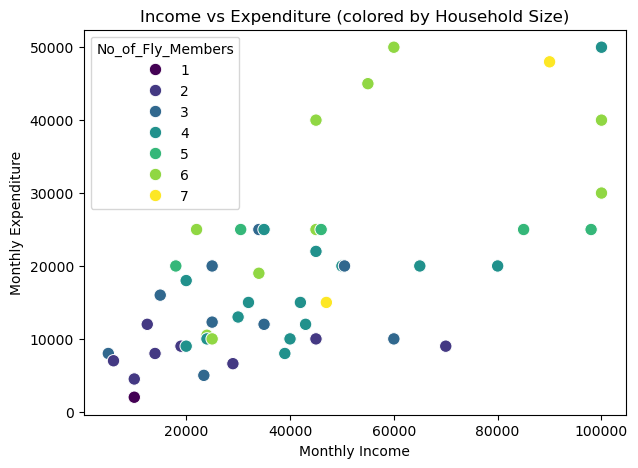

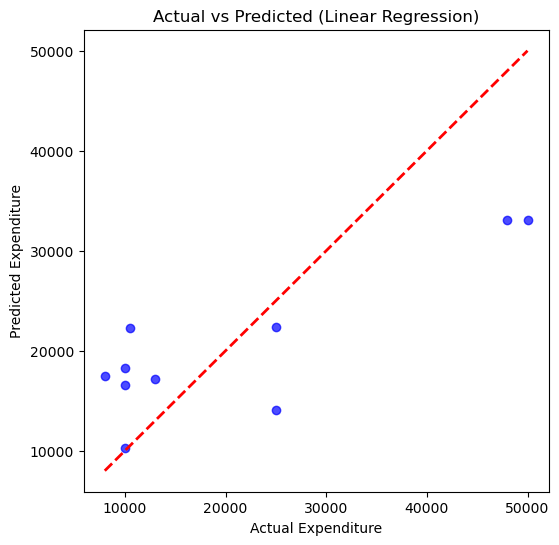

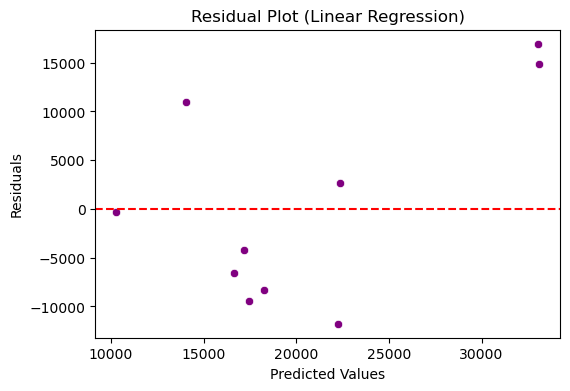

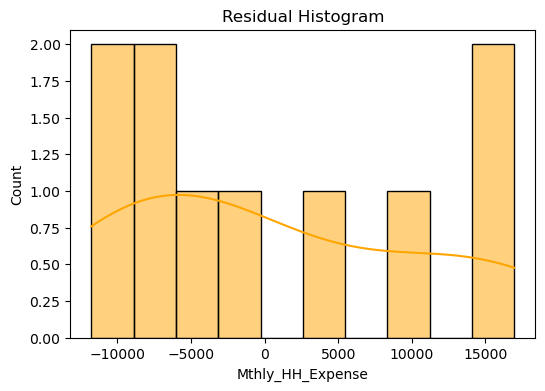

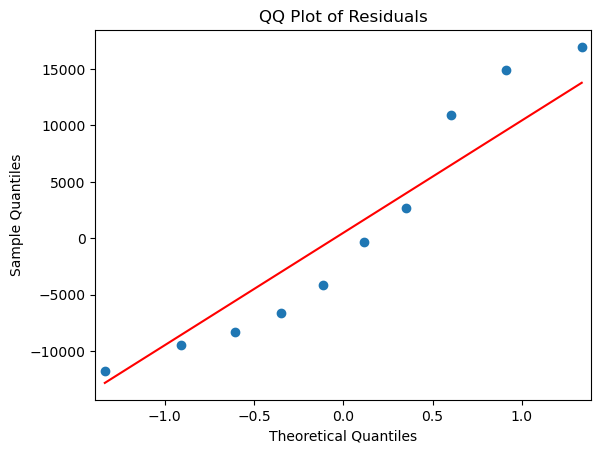

C:\Users\natar\AppData\Local\Temp\ipykernel_21732\3452575545.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


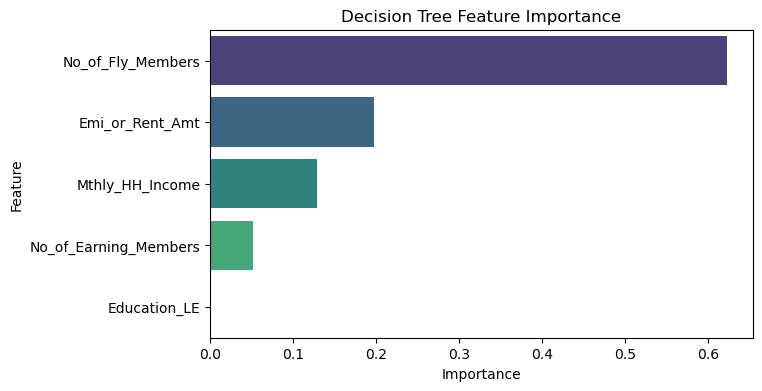

C:\Users\natar\AppData\Local\Temp\ipykernel_21732\3452575545.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model-Metric", y="Score", data=cv_df_melted, palette="Set2")


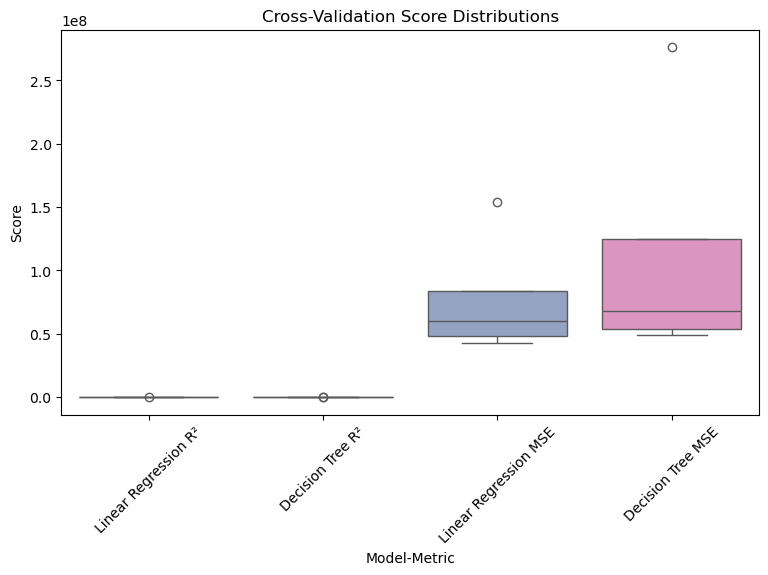


=== Interpretation Summary ===
Decision Tree captures more variance but may risk overfitting on small data.
Household size and income strongly increase expenditure. EMI also adds to spending.
Surprisingly, number of earners has a negative coefficient — possibly due to saving behavior in multi-earner households.
Education effect is weak in this dataset (may need a larger sample).
Residual diagnostics suggest mild non-normality, but overall fit is reasonable.


In [7]:
# Section 2

# Household Income & Expenditure Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

df = pd.read_csv("C:/Users/natar/Downloads/Inc_Exp_Data.csv")  # make sure file is in same folder

print("=== Dataset Overview ===\n")
print(df.head(), "\n")
print("Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes, "\n")
print("=== Descriptive Statistics ===\n")
print(df.describe(include="all"), "\n")

# ---------- Encode Categorical Variable ----------
# Label encoding
le = LabelEncoder()
df['Education_LE'] = le.fit_transform(df['Highest_Qualified_Member'])

# One-hot encoding check (robustness)
df_onehot = pd.get_dummies(df, columns=['Highest_Qualified_Member'], drop_first=True)

# ---------- Correlation Heatmap ----------
plt.figure(figsize=(7,5))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Variables Only)")
plt.show()

# ---------- Define Features & Target ----------
X = df[['Mthly_HH_Income','No_of_Fly_Members','Emi_or_Rent_Amt','No_of_Earning_Members','Education_LE']]
y = df['Mthly_HH_Expense']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- Models ----------
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)

lin_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)

# ---------- Cross-Validation (R² + MSE) ----------
cv_r2_lin = cross_val_score(lin_reg, X, y, cv=5, scoring="r2")
cv_mse_lin = -cross_val_score(lin_reg, X, y, cv=5, scoring="neg_mean_squared_error")

cv_r2_tree = cross_val_score(tree_reg, X, y, cv=5, scoring="r2")
cv_mse_tree = -cross_val_score(tree_reg, X, y, cv=5, scoring="neg_mean_squared_error")

results = {
    "Linear Regression": {
        "R² (test)": r2_score(y_test, y_pred_lin),
        "MSE (test)": mean_squared_error(y_test, y_pred_lin),
        "CV R² (mean)": np.mean(cv_r2_lin),
        "CV MSE (mean)": np.mean(cv_mse_lin)
    },
    "Decision Tree": {
        "R² (test)": r2_score(y_test, y_pred_tree),
        "MSE (test)": mean_squared_error(y_test, y_pred_tree),
        "CV R² (mean)": np.mean(cv_r2_tree),
        "CV MSE (mean)": np.mean(cv_mse_tree)
    }
}
results_df = pd.DataFrame(results).T
print("=== Model Comparison Results ===\n")
print(results_df, "\n")

# ---------- Linear Regression Coefficients ----------
coeff_df = pd.DataFrame({"Variable": X.columns, "Coefficient": lin_reg.coef_})
print("=== Linear Regression Coefficients ===\n")
print(coeff_df.sort_values(by="Coefficient", ascending=False), "\n")

# ---------- Statsmodels OLS (significance) ----------
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print("=== OLS Regression Summary (with p-values) ===\n")
print(ols_model.summary())

# ---------- Multicollinearity (VIF) ----------
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("\n=== Variance Inflation Factor (VIF) ===\n")
print(vif_data, "\n")

# Visualizations

# 1. Income vs Expense scatter
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Mthly_HH_Income'], y=df['Mthly_HH_Expense'], hue=df['No_of_Fly_Members'], palette="viridis", s=80)
plt.title("Income vs Expenditure (colored by Household Size)")
plt.xlabel("Monthly Income")
plt.ylabel("Monthly Expenditure")
plt.show()

# 2. Actual vs Predicted (Linear Regression)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Expenditure")
plt.ylabel("Predicted Expenditure")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

# 3. Residual Plot
residuals = y_test - y_pred_lin
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_lin, y=residuals, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

# 4. Residual Histogram & QQ Plot
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=10, kde=True, color="orange")
plt.title("Residual Histogram")
plt.show()

sm.qqplot(residuals, line="s")
plt.title("QQ Plot of Residuals")
plt.show()

# 5. Feature Importance (Decision Tree)
importances = tree_reg.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Decision Tree Feature Importance")
plt.show()

# 6. CV Distribution Boxplots
cv_df = pd.DataFrame({
    "Linear Regression R²": cv_r2_lin,
    "Decision Tree R²": cv_r2_tree,
    "Linear Regression MSE": cv_mse_lin,
    "Decision Tree MSE": cv_mse_tree
})
cv_df_melted = cv_df.melt(var_name="Model-Metric", value_name="Score")

plt.figure(figsize=(9,5))
sns.boxplot(x="Model-Metric", y="Score", data=cv_df_melted, palette="Set2")
plt.title("Cross-Validation Score Distributions")
plt.xticks(rotation=45)
plt.show()

# ---------- Quick Interpretation ----------
print("\n=== Interpretation Summary ===")
if np.mean(cv_r2_lin) > np.mean(cv_r2_tree):
    print("Linear Regression generalizes better (higher CV R²).")
else:
    print("Decision Tree captures more variance but may risk overfitting on small data.")
print("Household size and income strongly increase expenditure. EMI also adds to spending.")
print("Surprisingly, number of earners has a negative coefficient — possibly due to saving behavior in multi-earner households.")
print("Education effect is weak in this dataset (may need a larger sample).")
print("Residual diagnostics suggest mild non-normality, but overall fit is reasonable.")
